In [1]:
from keras.datasets import mnist

In [2]:
# 下載手寫數字資料集 mnist
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()

In [3]:
print("資料集的張量維度: ", train_imgs.ndim)

資料集的張量維度:  3


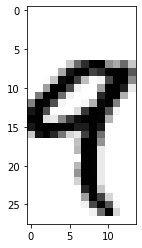

In [4]:
# 這邊取出第4比資料小玩一下


digit = train_imgs[4]

# [y軸全出取， x軸取 正7 ~ 負7(剛好是28的中間區域)]
digit = digit[:, 7:-7]

import matplotlib.pyplot as plt

plt.imshow(digit, cmap=plt.cm.binary)

In [5]:
# 前置資料整理

print("train_imgs 原本資料 shape: ", train_imgs.shape)
train_imgs = train_imgs.reshape(60000, 28*28)  # 將原本一張圖2維張量 (28, 28) 資料 reshape 成我們想要的(28*28)(60000指6萬張圖)
train_imgs = train_imgs.astype('float32') / 255  # 原本資料室 unit8 0~255 之間的灰階，除以 255 把原本 255 變 1 其他全變 0 
print("train_imgs 整理後資料 shape: ", train_imgs.shape)

print('---'*20)

print("test_imgs 原本資料 shape: ", test_imgs.shape)
test_imgs = test_imgs.reshape(10000, 28*28)  # 同理
test_imgs = test_imgs.astype('float32') / 255
print("test_imgs 整理後資料 shape: ", test_imgs.shape)

from keras.utils import to_categorical
# 對標籤分類，原本是一個純量，分類後彙變成一個 10 維向量 eg. [0. 0. 0. ... 1. 0. 0.]
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_imgs 原本資料 shape:  (60000, 28, 28)
train_imgs 原本資料 shape:  (60000, 784)
------------------------------------------------------------
train_imgs 原本資料 shape:  (10000, 28, 28)
train_imgs 原本資料 shape:  (10000, 784)


In [6]:
# 建立神經網路

from keras import models, layers

network = models.Sequential()
# relu 激勵函數是 max(x, 0) 輸出的 512 個值只放行大於 0 的輸出。
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
# softmax 可以理解為加權數，這邊代表 1 ~ 10 的機率分布，值在 0~1 之間
network.add(layers.Dense(10, activation='softmax')) 

In [7]:
# 編譯神經網路

# rmsprop優化器: 規範梯度下降的規則，categorical_crossentropy 是損失函數。
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# 訓練

# epochs 跑 5 runs，一次訓練 128 組圖片
network.fit(train_imgs, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2549 - accuracy: 0.9262
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1038 - accuracy: 0.9698
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0678 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0502 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0375 - accuracy: 0.9891


In [9]:
test_loss, test_acc = network.evaluate(test_imgs, test_labels)
print('test_acc: ', test_acc)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
